In [1]:
import os
import sys
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [2]:
dir = os.path.join(array_dir, 'sample_skypy_lens')

load all

In [3]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]

ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

# all_files = glob(dir + '/sample_skypy_lens_*.npy')
# grid_1 = [np.load(i) for i in all_files if '_1_' in i]
# grid_3 = [np.load(i) for i in all_files if '_3_' in i]
# grid_5 = [np.load(i) for i in all_files if '_5_' in i]

grid_1, grid_3, grid_5 = [], [], []

for grid in grid_oversample:
    for num in num_samples:
        file = glob(dir + f'/sample_skypy_lens_{grid}_{num}.npy')[0]
        array = np.load(file)
        if grid == 1:
            grid_1.append(array)
        elif grid == 3:
            grid_3.append(array)
        elif grid == 5:
            grid_5.append(array)

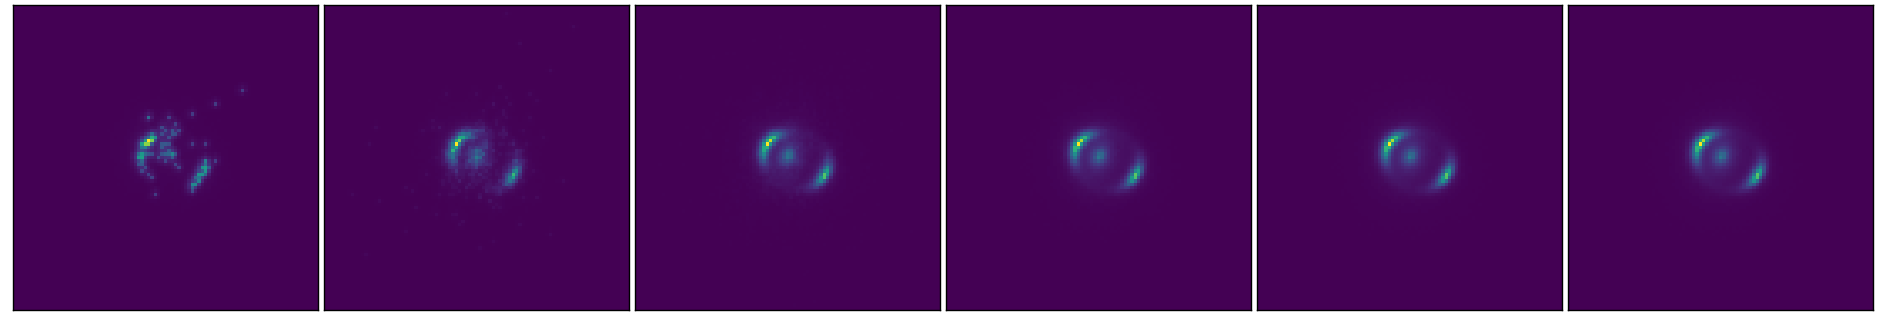

In [4]:
plot.plot_list(grid_1)

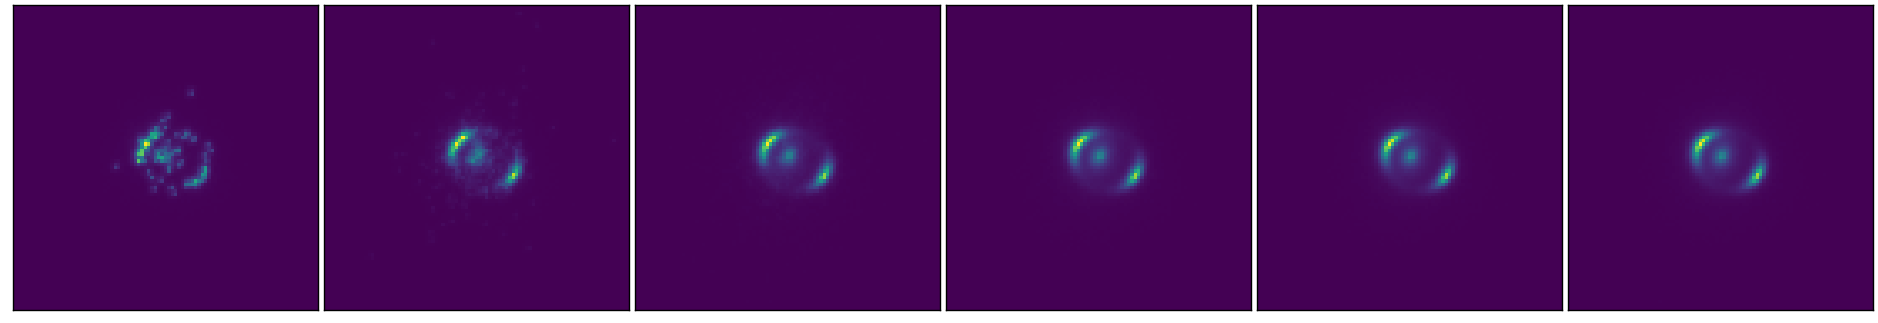

In [5]:
plot.plot_list(grid_3)

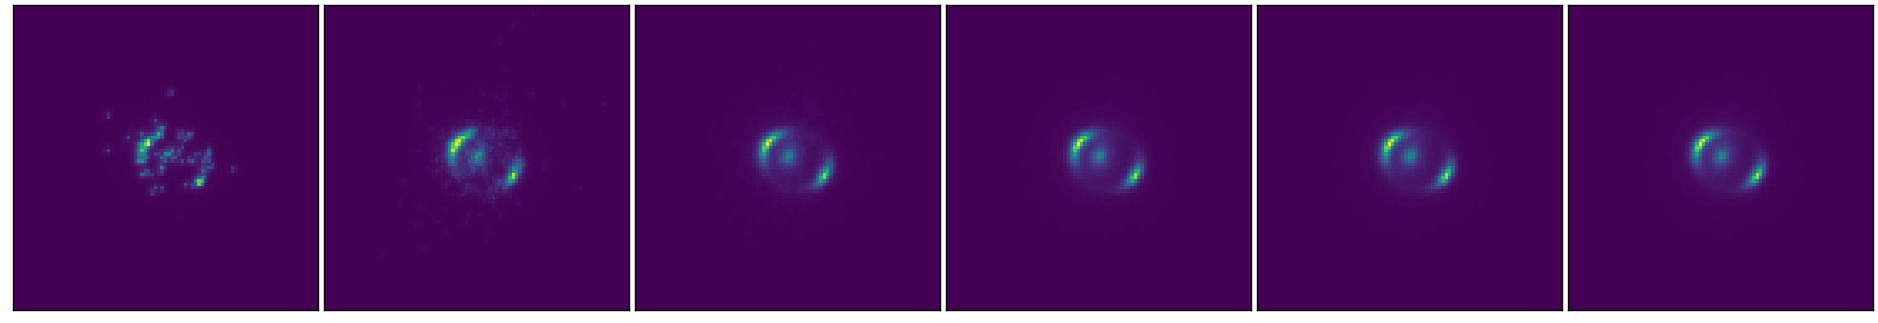

In [6]:
plot.plot_list(grid_5)

get $\chi^2$

In [7]:
chi_squared_1 = [stats.chi2_distance(i, ideal) for i in grid_1]
chi_squared_3 = [stats.chi2_distance(i, ideal) for i in grid_3]
chi_squared_5 = [stats.chi2_distance(i, ideal) for i in grid_5]

chi_squared = np.concatenate([chi_squared_1, chi_squared_3, chi_squared_5])

print(chi_squared_1)
print(chi_squared_3)
print(chi_squared_5)

[351.05733523952546, 88.43880546790922, 22.135610660744113, 2.1788783103051728, 1.1337188046939077, 0.9893808849749708]
[296.80583894922694, 86.45039585770705, 20.34255337268858, 5.871979138181852, 0.2494220028799363, 0.05058884032912786]
[367.72864927216546, 90.74257807676443, 15.547874353266938, 10.97523735007214, 0.2387250070042252, 0.0]


In [8]:
# print(len(num_samples))
# print(len(chi_squared_1), len(chi_squared_3), len(chi_squared_5))

In [9]:
execution_time_1 = np.load(os.path.join(dir, 'execution_time_1.npy'))
execution_time_3 = np.load(os.path.join(dir, 'execution_time_3.npy'))
execution_time_5 = np.load(os.path.join(dir, 'execution_time_5.npy'))

execution_time_x_1 = np.load(os.path.join(dir, 'execution_time_x_1.npy'))
execution_time_x_3 = np.load(os.path.join(dir, 'execution_time_x_3.npy'))
execution_time_x_5 = np.load(os.path.join(dir, 'execution_time_x_5.npy'))

print(execution_time_x_1)
print(execution_time_1)

[[       1      100]
 [       1     1000]
 [       1    10000]
 [       1   100000]
 [       1  1000000]
 [       1 10000000]]
[  52.74701309  123.00043654  314.89752984  823.09971142 1694.8874743
 2335.80779481]


In [10]:
execution_time_1_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_1]
execution_time_3_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_3]
execution_time_5_txt = [str(datetime.timedelta(seconds=round(i))) for i in execution_time_5]

In [11]:
print(execution_time_1)

[  52.74701309  123.00043654  314.89752984  823.09971142 1694.8874743
 2335.80779481]


In [12]:
score_1, score_3, score_5 = [], [], []

for i, _ in enumerate(chi_squared_1):
    score_1.append((1 - np.abs(chi_squared_1[i])) / execution_time_1[i])
    score_3.append((1 - np.abs(chi_squared_3[i])) / execution_time_3[i])
    score_5.append((1 - np.abs(chi_squared_5[i])) / execution_time_5[i])

print(score_1, score_3, score_5)

[-6.636533800097688, -0.7108820742789236, -0.06711901065547149, -0.0014322424050836266, -7.889538787774371e-05, 4.546228096604151e-06] [-1.0050703669312462, -0.18674481528064052, -0.016924210485897123, -0.0017641359386746352, 9.903067805659218e-05, 6.18076712790724e-05] [-0.45176814364834883, -0.08881935612025432, -0.006632713106366553, -0.0018794251103617695, 5.792845290229181e-05, 3.202767755426791e-05]


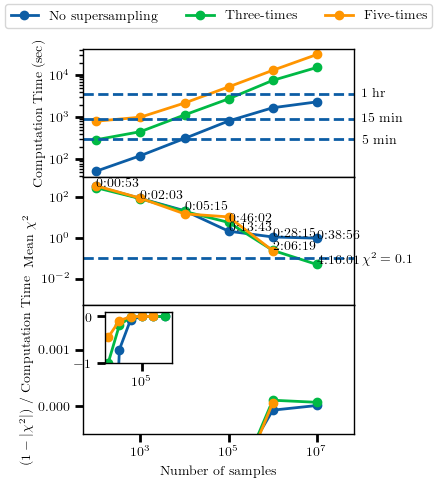

In [18]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(3.5, 5))

# remove vertical space between axes
fig.subplots_adjust(hspace=0)

plt.xscale('log')
plt.xlabel('Number of samples')
plt.xlim(5 * 10 ** 1, 7 * 10 ** 7)

ax1 = ax[0].plot(num_samples, execution_time_1, linestyle='-', marker='o')
ax2 = ax[0].plot(num_samples, execution_time_3, linestyle='-', marker='o')
ax3 = ax[0].plot(num_samples, execution_time_5, linestyle='-', marker='o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Computation Time (sec)')
ax[0].axhline(y=3600, linestyle='--')
ax[0].axhline(y=900, linestyle='--')
ax[0].axhline(y=300, linestyle='--')
x0, x1 = plt.gca().get_xlim()
ax[0].text(x1 * 1.5, 3600, '1 hr', ha='left', va='center')
ax[0].text(x1 * 1.5, 900, '15 min', ha='left', va='center')
ax[0].text(x1 * 1.5, 300, '5 min', ha='left', va='center')

ax[1].plot(num_samples, chi_squared_1, linestyle='-', marker='o')
ax[1].plot(num_samples, chi_squared_3, linestyle='-', marker='o')
ax[1].plot(num_samples[:-1], chi_squared_5[:-1], linestyle='-', marker='o')
ax[1].axhline(y=0.1, linestyle='--')
x0, x1 = plt.gca().get_xlim()
ax[1].text(x1 * 1.5, 0.1, '$\chi^2=0.1$', ha='left', va='center')
ax[1].set_yscale('log')
ax[1].set_ylabel('Mean $\chi^2$')
ax[1].set_ylim(5 * 10 ** -4, 1000)

for i, txt in enumerate(execution_time_1_txt):
    ax[1].annotate(txt, (num_samples[i], chi_squared_1[i]))

for i, txt in enumerate(execution_time_3_txt):
    if i > 2:
        ax[1].annotate(txt, (num_samples[i], chi_squared_3[i]))

# for i, txt in enumerate(execution_time_5_txt):
#     ax.annotate(txt, (num_samples[i], chi_squared_5[i]))

ax[2].plot(num_samples[1:], score_1[1:], linestyle='-', marker='o', label='No supersampling')
ax[2].plot(num_samples[1:], score_3[1:], linestyle='-', marker='o', label='Three-times')
ax[2].plot(num_samples[1:-1], score_5[1:-1], linestyle='-', marker='o', label='Five-times')
ax[2].set_ylabel(r'$(1 - |\chi^2|)$ / Computation Time')
ax[2].set_ylim(-0.0005, 0.0018)

inset_axes = ax[2].inset_axes(bounds=[0.08,0.55,0.25,0.4])
inset_axes.plot(num_samples, score_1, linestyle='-', marker='o')
inset_axes.plot(num_samples, score_3, linestyle='-', marker='o')
inset_axes.plot(num_samples[:-1], score_5[:-1], linestyle='-', marker='o')
inset_axes.set_ylim(-1, 0.1)
inset_axes.set_xscale('log')
inset_axes.set_xlim(5 * 10 ** 1, 5 * 10 ** 7)
inset_axes.set_xticks = []


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 3.4), ncol=3)

plt.savefig(os.path.join(figure_dir, 'calc_params.png'))
plt.show()